In [1]:
import numpy as np
import pandas as pd
import main
las_data = pd.read_csv(main.csv_las_out_full_path, delimiter=';')
# удаляем скважины, по которым нет водонасыщенности
well_name_list = las_data['well_name'].value_counts().index.tolist()
for well_name in well_name_list:
    well_data = las_data[las_data['well_name'] == well_name]
    if np.isnan(well_data['kvo'].mean()) or np.isnan(well_data['rp'].mean()) or np.isnan(well_data['kgl'].mean()) or np.isnan(well_data['aps'].mean()):
        # axis  = 0, удаляем столбцы
        las_data = las_data.drop(las_data[las_data['well_name'] == well_name].index, axis = 0)

In [2]:
# считает среднее значение параметра по высоте с пропуском nan
def calc_mean_value_by_h(h_arr, val_arr):
    hv_sum = 0.
    h_sum = 0.
    prev_nan_val = False
    for h, val in zip(h_arr, val_arr):
        if not(np.isnan(h)) and not(np.isnan(val)):
            h_sum += h
            hv_sum += h * val

    # print(h_sum, hv_sum)
    return hv_sum/h_sum

In [7]:
# получим нефтенасыщенность
las_data['kno'] = 1 - las_data['kvo']

Index(['well_name', 'STRT', 'STOP', 'DEPT', 'aps', 'rp', 'kp', 'kgl', 'kpr',
       'kvo', 'kng', 'lit', 'satur', 'UWI', 'kno'],
      dtype='object')

In [111]:
# переведем данные с 0 в 1 
from sklearn.preprocessing import MinMaxScaler
# уберем Nan
#las_data = las_data.ffill()
# las_data_norm=las_data.copy()
# las_data_norm['aps'] = MinMaxScaler().fit_transform(las_data['aps'])
# # las_data_norm['rp'] = MinMaxScaler().fit_transform(las_data['rp'])
# las_data_norm['kp'] = MinMaxScaler().fit_transform(las_data['kp'])
# las_data_norm['kgl'] = MinMaxScaler().fit_transform(las_data['kgl'])
# las_data_norm['kpr'] = MinMaxScaler().fit_transform(las_data['kpr'])
# las_data_norm['kvo'] = MinMaxScaler().fit_transform(las_data['kvo'])
# las_data_norm['kng'] = MinMaxScaler().fit_transform(las_data['kng'])
# # Применить нормализацию к данным
# las_data=las_data_norm
data_well = las_data[las_data['well_name'] == '318']
# data_well['UWI'][data_well['UWI'].index]

40607

In [112]:
# заполним данные по скважинам
well_name_list = las_data['well_name'].value_counts().index.tolist()
data_well_for_analize = pd.DataFrame() 
first = True
kno_list = []
kgl_list = []
rp_list = []
aps_list = []
kp_list = []
kpr_list = []
kng_list = []
satur_list = []
uwi_name_list = []

for well_name in well_name_list:
    # print(well_name)
    data_well_list = []
    # Выделяем даные для одной скважины
    data_well = las_data[las_data['well_name'] == well_name]
    uwi_name_list.append(data_well['UWI'][data_well['UWI'].index[0]])
    kno_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['kno']))
    kgl_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['kgl']))
    rp_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['rp']))
    aps_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['aps']))
    kp_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['kp']))
    kpr_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['kpr']))
    kng_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['kng']))
    satur_list.append(calc_mean_value_by_h(data_well['DEPT'],data_well['satur']))

    

data_well_for_analize = pd.DataFrame({'well_name':well_name_list, 'UWI':uwi_name_list, 'kno':kno_list,
                                      'kgl':kgl_list, 'rp':rp_list, 
                                      'aps':aps_list, 'kp':kp_list, 'kpr':kpr_list,
                                      'kng':kng_list, 'satur':satur_list})

data_well_for_analize.head()

,UWI,aps,kgl,kng,kno,kp,kpr,rp,satur,well_name
0,314_2R,0.365555,0.231484,0.003782,0.185192,0.177914,105.315908,47.031857,0.766534,4r
1,314_431PL,0.764738,0.218965,0.003927,0.234908,0.179562,39.674645,6.362234,0.615760,643pl
2,314_342,0.322467,0.193235,0.012291,0.197897,0.138767,14.150157,24.286652,0.566677,554
3,314_324,0.265558,0.247047,0.018836,0.132816,0.105022,2.539692,20.955415,0.455736,536
4,314_320,0.280630,0.248633,0.021536,0.123196,0.108707,5.566618,27.123303,0.438042,532


In [113]:
data_well_for_analize['kno'].describe()

count    177.000000
mean       0.104252
std        0.053230
min        0.000000
25%        0.064458
50%        0.102949
75%        0.133872
max        0.270429
Name: kno, dtype: float64

In [117]:
header_data = pd.read_csv(main.data_dir + "\\Well_Header.csv", delimiter='\t')
header_data.head()
header_data = header_data.rename(columns={'WellName': main.keys_dict[main.kid_well_dop_id]})
del header_data['KB']
del header_data['TopDepth']
del header_data['BottomDepth']
del header_data['Symbol']
del header_data['Rig']
del header_data['Field']
header_data.head()

,UWI,X-Coord,Y-Coord
0,314_103ST2,354719.52,6470051.42
1,314_107,354693.18,6470164.36
2,314_121,354433.25,6468384.38
3,314_125PL,354717.25,6470061.16
4,314_134,354478.44,6468306.61


In [118]:
# загружаем wc
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'wc'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
water_content_data.head()

,well_name,date_start,wc
0,380,04.07.1905,0.49
1,379,01.12.2006,0.30
2,370,01.02.2007,0.13
3,417,01.03.2007,0.08
4,389,01.08.2007,0.22


In [120]:
# del water_content_data['Дата запуска']
data_for_analize = pd.merge(data_well_for_analize, water_content_data, on=main.keys_dict[main.kid_well])
data_for_analize = pd.merge(data_for_analize, header_data, on=main.keys_dict[main.kid_well_dop_id])
data_for_analize.head()

,UWI,aps,kgl,kng,kno,kp,kpr,rp,satur,well_name,date_start,wc,X-Coord,Y-Coord
0,314_342,0.322467,0.193235,0.012291,0.197897,0.138767,14.150157,24.286652,0.566677,554,01.06.2008,0.08,351657.56,6464689.29
1,314_324,0.265558,0.247047,0.018836,0.132816,0.105022,2.539692,20.955415,0.455736,536,01.08.2009,0.26,352508.25,6467277.77
2,314_320,0.280630,0.248633,0.021536,0.123196,0.108707,5.566618,27.123303,0.438042,532,01.01.2010,0.30,352508.25,6467304.77
3,314_351,0.251225,0.247385,0.014797,0.080020,0.108428,1.034750,19.006996,0.363576,563,01.06.2010,0.33,349963.39,6464172.47
4,314_381,0.309972,0.222660,0.028106,0.160185,0.123135,8.561217,17.427380,0.574928,593,01.04.2010,0.25,351543.76,6464555.85


In [24]:
# оставлеям только данные для x и y отдельно
y = data_for_analize['wc']
well_names = data_for_analize['well_name']
# удаляем неиспользуеиые для обучения колонки
data_for_analize.drop(['wc', 'well_name', 'date_start', 'kpr'], axis=1, inplace=True)
# округлим вектор ответов
y_r = int(10) * round(y,1)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

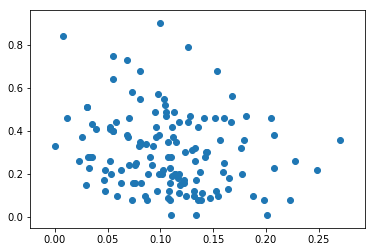

In [11]:
# зависимость обводненности от нефтенасыщенности 
X = data_for_analize['kno']
Y = y
plt.scatter(X,Y)

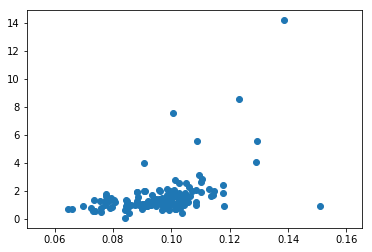

In [12]:
# зависимость пористости от проницаемости 
X = data_for_analize['kp']
Y = data_for_analize['kpr']
plt.scatter(X,Y)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

x_train, x_hold, y_train, y_hold = train_test_split(data_for_analize.values, y_r, test_size=0.3, random_state=17)

In [26]:
tree = DecisionTreeClassifier(max_depth=20, random_state=17)
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_hold)
accuracy_score(y_hold, tree_pred)

0.14285714285714285

In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score
count_vals = data_for_analize.shape[1]
print(count_vals)
tree_params = {'max_depth': range(1,30), 'max_features': range(1, count_vals)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(x_train, y_train)

7
Fitting 5 folds for each of 174 candidates, totalling 870 fits


D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[Parallel(n_jobs=-1)]: Done 870 out of 870 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': range(1, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [18]:
tree_grid.best_params_

{'max_depth': 4, 'max_features': 6}

In [28]:
tree_grid.best_score_

0.27835051546391754

In [29]:
accuracy_score(y_hold, tree_grid.predict(x_hold))

0.26190476190476192